# Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)

## About Dataset
https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio

**Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)**

- Speech audio-only files (16bit, 48kHz .wav) from the RAVDESS. Full dataset of speech and song, audio and video (24.8 GB) available from Zenodo. Construction and perceptual validation of the RAVDESS is described in our Open Access paper in PLoS ONE.

### Files

- This portion of the RAVDESS contains **1440 files**: **60 trials per actor x 24 actors** = 1440.

- The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent.
- Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

### File naming convention

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

Filename identifiers:

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).  
- Vocal channel (01 = speech, 02 = song).  
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).  
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.  
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").  
- Repetition (01 = 1st repetition, 02 = 2nd repetition).   
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: 03-01-06-01-02-01-12.wav  
- Audio-only (03)
- Speech (01)
- Fearful (06)
- Normal intensity (01)
- Statement "dogs" (02)
- 1st Repetition (01)
- 12th Actor (12)
Female, as the actor ID number is even.

### Provenance
Sources

https://zenodo.org/record/1188976
Collection Methodology

Twenty-four professional actors, working in Toronto, Ontario, Canada were hired for stimulus creation. Recordings took place in a professional recording studio at Ryerson University.

### Coverage
Temporal Coverage Start Date

05/16/2018
Temporal Coverage End Date

05/16/2018
Geospatial Coverage
a
Toronto, Canada

## 🔊 Working with Audio in Python

### Importing Dataset from Kaggle

In [1]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("uwrfkaggler/ravdess-emotional-speech-audio")

# print("Path to dataset files:", path)

### Transferring dataset to current directory

In [ ]:
# Import necessary libraries
# import shutil
# import os

# This is the source directory from kagglehub
# path = ... (from the previous cell)

# Define the name for your local destination folder
# output_dir = "ravdess_data"

# Copy the entire directory from the cache path to your new local directory
# dirs_exist_ok=True prevents an error if you run the cell multiple times
# shutil.copytree(path, output_dir, dirs_exist_ok=True)

# print(f"Dataset files copied to: '{output_dir}'")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

### Reading in Audio Files
There are many types of audio files: `mp3`, `wav`, `m4a`, `flac`, `ogg`

In [8]:
data_set = "ravdess_data"

audio_files = glob(f'{output_dir}/*/*.wav')

In [9]:
# Play audio file
ipd.Audio(audio_files[0])

In [15]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sample_rate: {sr}')

y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape y: (86081,)
sample_rate: 22050


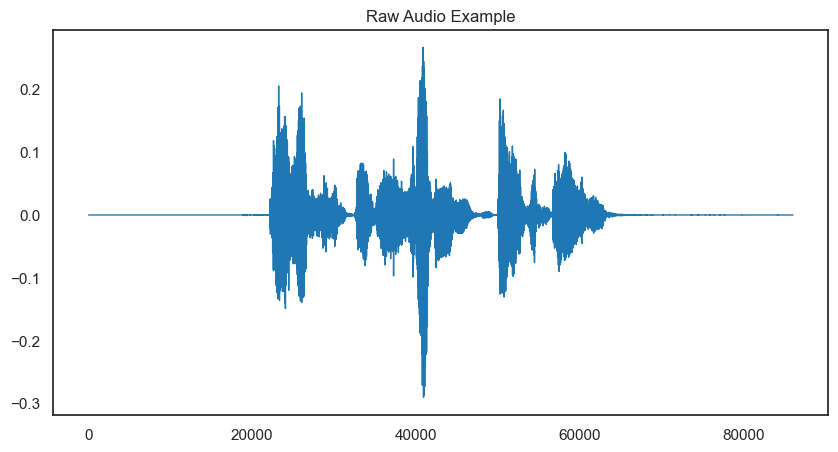

In [16]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

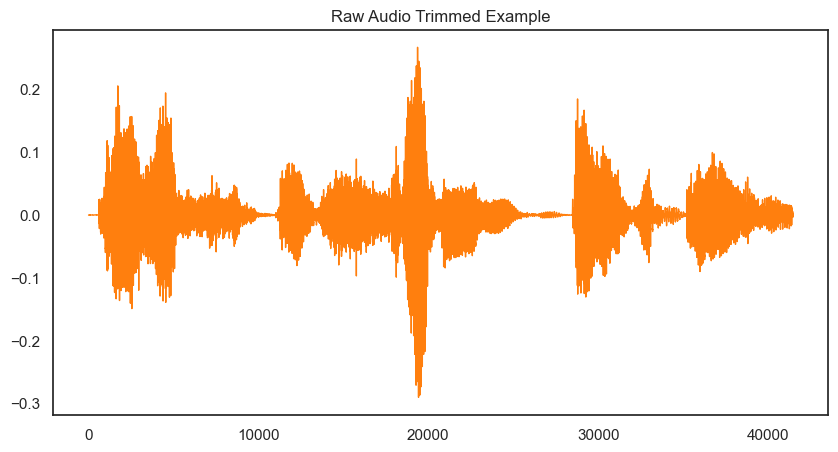

In [17]:
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()

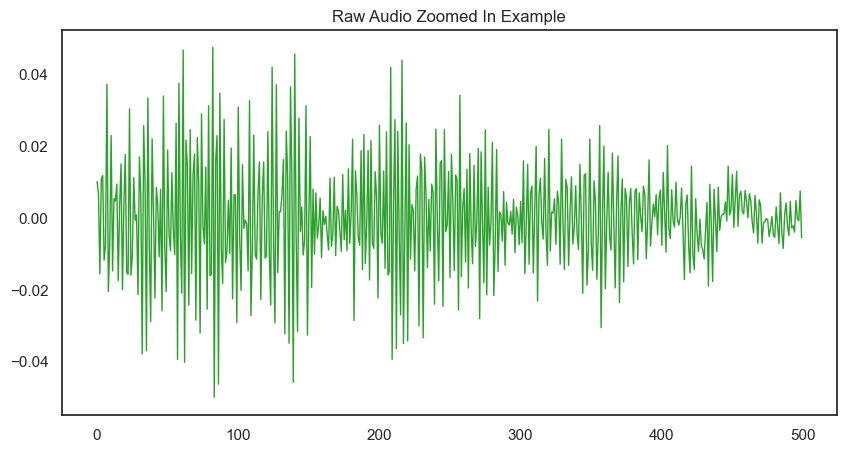

In [18]:
pd.Series(y[30000:30500]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()

### Spectogram

In [19]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 169)

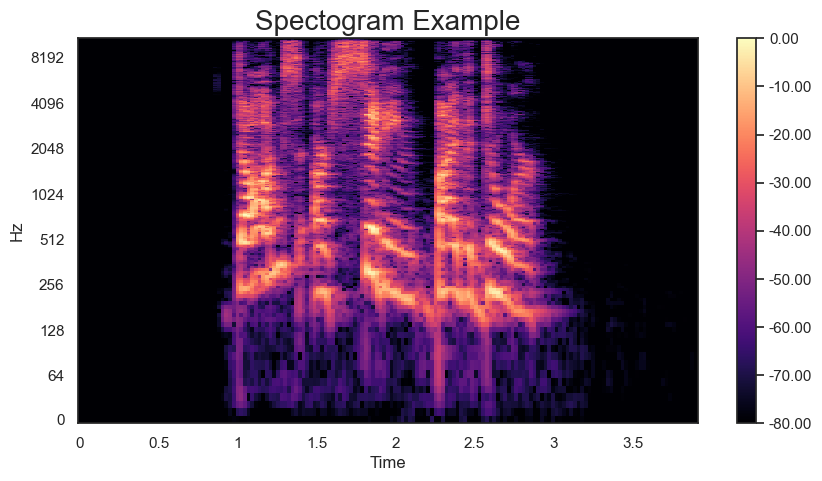

In [20]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

### Mel Spectogram

In [21]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

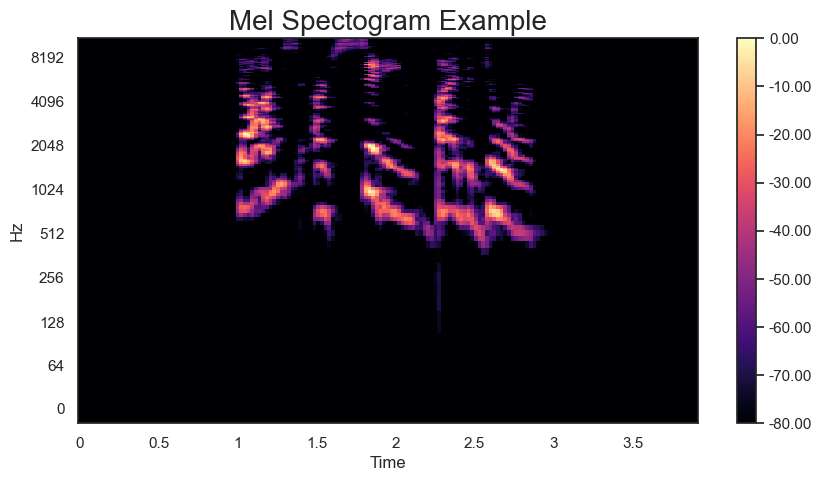

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [23]:
# Function to extract information from filename
def extract_info(filename):
    parts = filename.split('/')[-1].split('.')[0].split('-')
    return {
        'modality': int(parts[0]),
        'vocal_channel': int(parts[1]),
        'emotion': int(parts[2]),
        'emotional_intensity': int(parts[3]),
        'statement': int(parts[4]),
        'repetition': int(parts[5]),
        'actor': int(parts[6])
    }

# Create a DataFrame with information extracted from filenames
audio_info_df = pd.DataFrame([extract_info(f) for f in audio_files])

# Map numerical codes to meaningful labels based on the dataset description
emotion_mapping = {
    1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'surprise', 8: 'disgust'
}
intensity_mapping = {
    1: 'normal', 2: 'strong'
}
modality_mapping = {
    3: 'audio-only' # Based on dataset description
}
vocal_channel_mapping = {
    1: 'speech', 2: 'song' # Based on dataset description
}

audio_info_df['emotion'] = audio_info_df['emotion'].map(emotion_mapping)
audio_info_df['emotional_intensity'] = audio_info_df['emotional_intensity'].map(intensity_mapping)
audio_info_df['modality'] = audio_info_df['modality'].map(modality_mapping)
audio_info_df['vocal_channel'] = audio_info_df['vocal_channel'].map(vocal_channel_mapping)


display(audio_info_df.head())
display(audio_info_df.info())

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor
0,audio-only,speech,angry,normal,2,1,16
1,audio-only,speech,fearful,normal,2,2,16
2,audio-only,speech,fearful,strong,1,2,16
3,audio-only,speech,angry,strong,1,1,16
4,audio-only,speech,surprise,normal,1,1,16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   modality             1440 non-null   object
 1   vocal_channel        1440 non-null   object
 2   emotion              1440 non-null   object
 3   emotional_intensity  1440 non-null   object
 4   statement            1440 non-null   int64 
 5   repetition           1440 non-null   int64 
 6   actor                1440 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 78.9+ KB


None

/var/folders/y_/0rmj_yyx0073l52vx1lj1msh0000gn/T/ipykernel_36870/3070859679.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=audio_info_df, y='emotion', ax=axes[0], palette='viridis')
/var/folders/y_/0rmj_yyx0073l52vx1lj1msh0000gn/T/ipykernel_36870/3070859679.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=audio_info_df, y='emotional_intensity', ax=axes[1], palette='viridis')


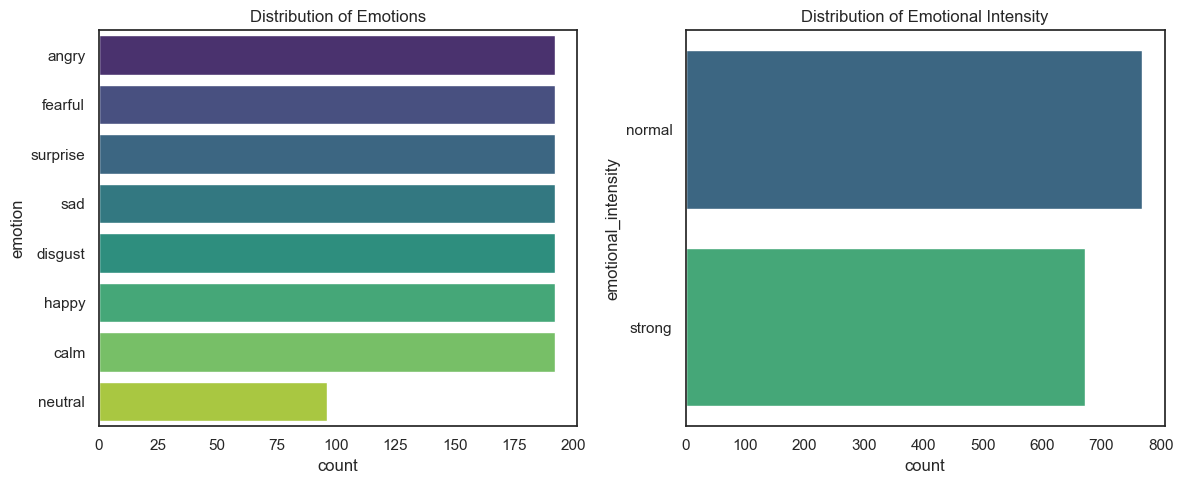

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=audio_info_df, y='emotion', ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Emotions')

sns.countplot(data=audio_info_df, y='emotional_intensity', ax=axes[1], palette='viridis')
axes[1].set_title('Distribution of Emotional Intensity')

plt.tight_layout()
plt.show()